<a href="https://colab.research.google.com/github/shahin28jan/WomenClothing_Review_Analysis_by_LSTM-GRU/blob/main/WomenClothing_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Women Clothing Review Dataset from kaggle

In [ ]:
!mkdir -p ~/ .kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d nicapotato/womens-ecommerce-clothing-reviews

  0% 0.00/2.79M [00:00<?, ?B/s]
100% 2.79M/2.79M [00:00<00:00, 204MB/s]


Importing Libraries

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,Embedding,Flatten, LSTM, GRU
import pandas as pd
import numpy as np


Unzipping the file

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/womens-ecommerce-clothing-reviews.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
df = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
df= df.drop(['Unnamed: 0', 'Clothing ID', 'Age', 'Title','Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'], axis=1)



In [ ]:
df.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [ ]:
df.isnull().sum()

Review Text    845
Rating           0
dtype: int64

There s 845 Null value in Review Text column

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

Review Text    0
Rating         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  22641 non-null  object
 1   Rating       22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


<Axes: xlabel='Rating', ylabel='count'>

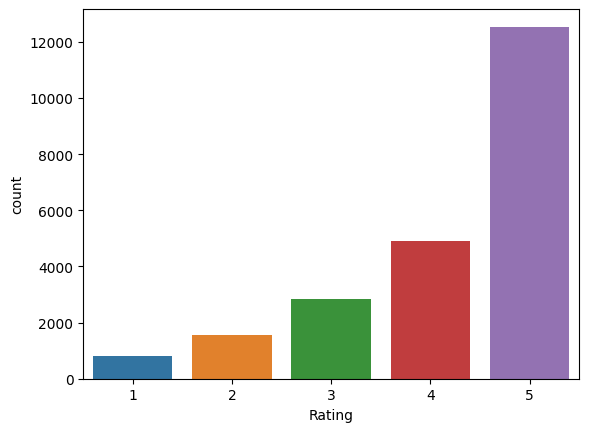

In [ ]:
import seaborn as sns
sns.countplot(data=df, x= 'Rating' )

according to bar graph data look like imbalence, So i convert 1 to 4 rating into 0 rating.

In [ ]:
X=df['Review Text']
Y=df['Rating']

In [ ]:
Y=Y.map({1:0,2:0,3:0,4:0,5:1})
Y

0        0
1        1
2        0
3        1
4        1
        ..
23481    1
23482    0
23483    0
23484    0
23485    1
Name: Rating, Length: 22641, dtype: int64

spliting data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=30)

# Tokenize the train data

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
tokenizer.document_count

18112

In [ ]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
len(X_train_sequences)

18112

In [ ]:
y_test.shape

(4529,)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train contains your integer labels
y_train = to_categorical(y_train, num_classes=0)
y_test = to_categorical(y_test, num_classes=0)

In [ ]:
y_test.shape

(4529, 2)

# Tokenize the test data

In [ ]:
#tokenizer.fit_on_texts(X_test)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
len(X_test_sequences)

4529

In [ ]:
from keras.utils import pad_sequences
X_train = pad_sequences(X_train_sequences,padding='post',maxlen=100)
X_test = pad_sequences(X_test_sequences,padding='post',maxlen=100)

In [ ]:
#Build model with deep concept for the LSTM

model_LSTM= Sequential([
    Embedding(10000,32,input_length=100),
    LSTM(50,return_sequences=True),
    LSTM(50,return_sequences=True),
    LSTM(50),
    Dense(2, activation="softmax")
])

model_LSTM.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 32)           320000    
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           16600     
                                                                 
 lstm_8 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_12 (Dense)            (None, 2)                 102       
                                                                 
Total params: 377102 (1.44 MB)
Trainable params: 377102 (1.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history_LSTM = model_LSTM.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=5)

Epoch 1/5
566/566 [==============================] - 31s 46ms/step - loss: 0.5615 - acc: 0.7009 - val_loss: 0.4514 - val_acc: 0.7997
Epoch 2/5
566/566 [==============================] - 10s 18ms/step - loss: 0.4280 - acc: 0.8211 - val_loss: 0.4525 - val_acc: 0.8044
Epoch 3/5
566/566 [==============================] - 10s 17ms/step - loss: 0.3734 - acc: 0.8484 - val_loss: 0.4598 - val_acc: 0.7995
Epoch 4/5
566/566 [==============================] - 10s 17ms/step - loss: 0.3359 - acc: 0.8661 - val_loss: 0.5000 - val_acc: 0.7887
Epoch 5/5
566/566 [==============================] - 9s 16ms/step - loss: 0.3164 - acc: 0.8756 - val_loss: 0.5386 - val_acc: 0.7883


In [ ]:
model_accuracy = model_LSTM.evaluate(X_test,y_test)
print(f"Loss: {model_accuracy[0]}")
print(f"Accuracy: {model_accuracy[1]}")

142/142 [==============================] - 1s 9ms/step - loss: 0.5386 - acc: 0.7883
Loss: 0.5386492609977722
Accuracy: 0.7882534861564636


Saving LSTM model

In [ ]:
import tensorflow as tf
tf.keras.models.save_model(model_LSTM,'LSTM_model.h5')

<ipython-input-108-bd1204138e4f>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model_LSTM,'LSTM_model.h5')


In [ ]:
# Build model with deep concept for the GRU


model_GRU= Sequential([
    Embedding(10000,32,input_length=100),
    GRU(50,return_sequences=True),
    GRU(50),
    Dense(2, activation="softmax")
])

model_GRU.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 32)           320000    
                                                                 
 gru_12 (GRU)                (None, 100, 50)           12600     
                                                                 
 gru_13 (GRU)                (None, 50)                15300     
                                                                 
 dense_14 (Dense)            (None, 2)                 102       
                                                                 
Total params: 348002 (1.33 MB)
Trainable params: 348002 (1.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_GRU.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history_GRU = model_GRU.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=5)

Epoch 1/5
566/566 [==============================] - 26s 41ms/step - loss: 0.6856 - acc: 0.5627 - val_loss: 0.6853 - val_acc: 0.5560
Epoch 2/5
566/566 [==============================] - 10s 17ms/step - loss: 0.5686 - acc: 0.7197 - val_loss: 0.5194 - val_acc: 0.7582
Epoch 3/5
566/566 [==============================] - 7s 13ms/step - loss: 0.4447 - acc: 0.8005 - val_loss: 0.4498 - val_acc: 0.8008
Epoch 4/5
566/566 [==============================] - 8s 14ms/step - loss: 0.3757 - acc: 0.8442 - val_loss: 0.4406 - val_acc: 0.8066
Epoch 5/5
566/566 [==============================] - 6s 11ms/step - loss: 0.3238 - acc: 0.8696 - val_loss: 0.4463 - val_acc: 0.7975


In [ ]:
model_accuracy = model_GRU.evaluate(X_test,y_test)
print(f"Loss: {model_accuracy[0]}")
print(f"Accuracy: {model_accuracy[1]}")

142/142 [==============================] - 1s 6ms/step - loss: 0.4463 - acc: 0.7975
Loss: 0.44631439447402954
Accuracy: 0.7975270748138428


Saving GRU Model

In [ ]:
import tensorflow as tf
tf.keras.models.save_model(model_GRU,'GRU_model.h5')

<ipython-input-109-59d003c24919>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model_GRU,'GRU_model.h5')


function for plot

In [ ]:
import matplotlib.pyplot as plt
def plot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.plot(acc,'b',label='Training acc')
  plt.plot(val_acc,'r', label='Validation acc')
  plt.title('Training and Validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(loss, 'b', label='Training loss')
  plt.plot(val_loss, 'r', label='Validation loss')
  plt.title('Training and Validation loss')
  plt.legend()
  plt.show()

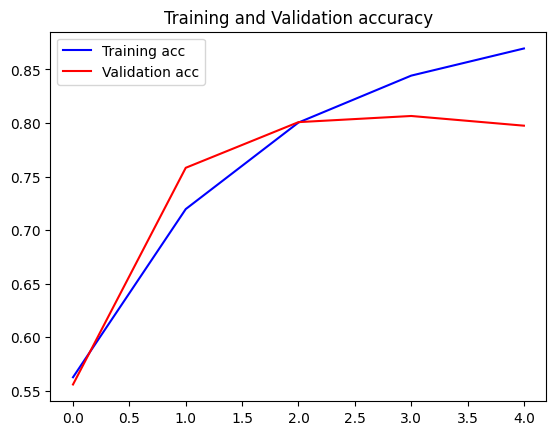

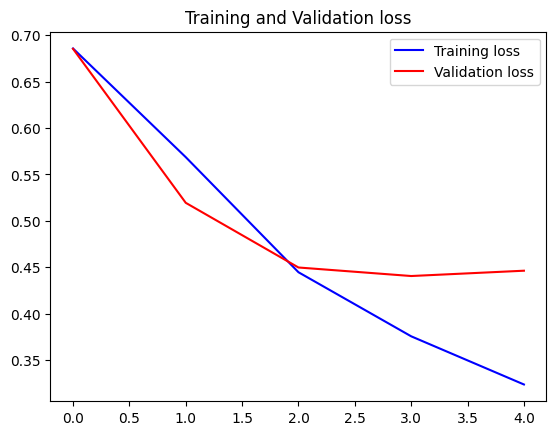

In [ ]:
plot(history_GRU)

Prediction on test data

In [ ]:
predictions = model_GRU.predict(X_test)*100
for i in range(0,10):
  if predictions[i][1] >50:
    print("Review Analysis: Positive")
    print("==============================")
  else:
  # print(f"Review: {test_data}")
   print("Review Analysis: Negative")
   print("==============================")

142/142 [==============================] - 1s 4ms/step
Review Analysis: Negative
Review Analysis: Positive
Review Analysis: Positive
Review Analysis: Positive
Review Analysis: Negative
Review Analysis: Positive
Review Analysis: Negative
Review Analysis: Negative
Review Analysis: Positive
Review Analysis: Negative


Prediction on new review

In [ ]:
sent=["this febric is vey silky and smooth.","This is very rough and dull clothe"]
test_sequences = pad_sequences(tokenizer.texts_to_sequences(sent), maxlen=100)
predictions = model_GRU.predict(test_sequences)*100
for i in range(0,len(sent)):
  if predictions[i][1] >50:
    print(f"Review: {sent[i]}")
    print("Review Analysis: Positive")
    print("==============================")
  else:
    print(f"Review: {sent[i]}")
    print("Review Analysis: Negative")
    print("==============================")

1/1 [==============================] - 0s 37ms/step
Review: this febric is vey silky and smooth.
Sentiment Analysis: Positive
Review: This is very rough and dull clothe
Sentiment Analysis: Negative
